In [1]:
import csv
import json
import numpy as np

### Step 1: Generate frame lists
- $4*4$ frame with $1$ object on the frame ($1$ for the object, $0$ for the empty grids)
- $100$ frames per frame list
- Fixed direction per frame list
- Speed: 1 movement every 1 frame, 2 frames, or 3 frames
- Loop over the movement as the object touches the boundary

In [2]:
def generate_movement_sequence(start_pos, direction, speed, num_frames=100):
    x, y = start_pos
    sequence = []

    for i in range(num_frames):
        frame = np.ones((7, 7), dtype=int)
        frame[x, y] = 200
        sequence.append(frame.tolist())

        if i % speed == 0:
            if direction == 'up':
                if x+1 <= 6:
                    x += 1
                else:
                    x, _ = start_pos
            elif direction == 'down':
                if x-1 >= 0:
                    x -= 1
                else:
                    x, _ = start_pos
            elif direction == 'left':
                if y-1 >= 0:
                    y -= 1
                else:
                    _, y = start_pos
            elif direction == 'right':
                if y+1 <= 6:
                    y += 1
                else:
                    _, y = start_pos

    return sequence

def generate_all_sequences():
    directions = ['up', 'down', 'left', 'right']
    speeds = [1,2,3]
    all_sequences = []

    for i in range(7):
        for j in range(7):
            for direction in directions:
                for speed in speeds:
                    sequence = generate_movement_sequence((i, j), direction, speed)
                    if sequence[0] != sequence[1]:
                        all_sequences.append((sequence, direction))

    return all_sequences

def save_to_csv(filename, all_sequences):
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        header = ['frame_{}'.format(i) for i in range(1, 101)] + ['direction']
        writer.writerow(header)

        for sequence, direction in all_sequences:
            serialized_sequence = [json.dumps(frame) for frame in sequence]
            row = serialized_sequence + [direction]
            writer.writerow(row)

# Generate all possible sequences
all_sequences = generate_all_sequences()

# Save to CSV
save_to_csv('movement_sequences.csv', all_sequences)


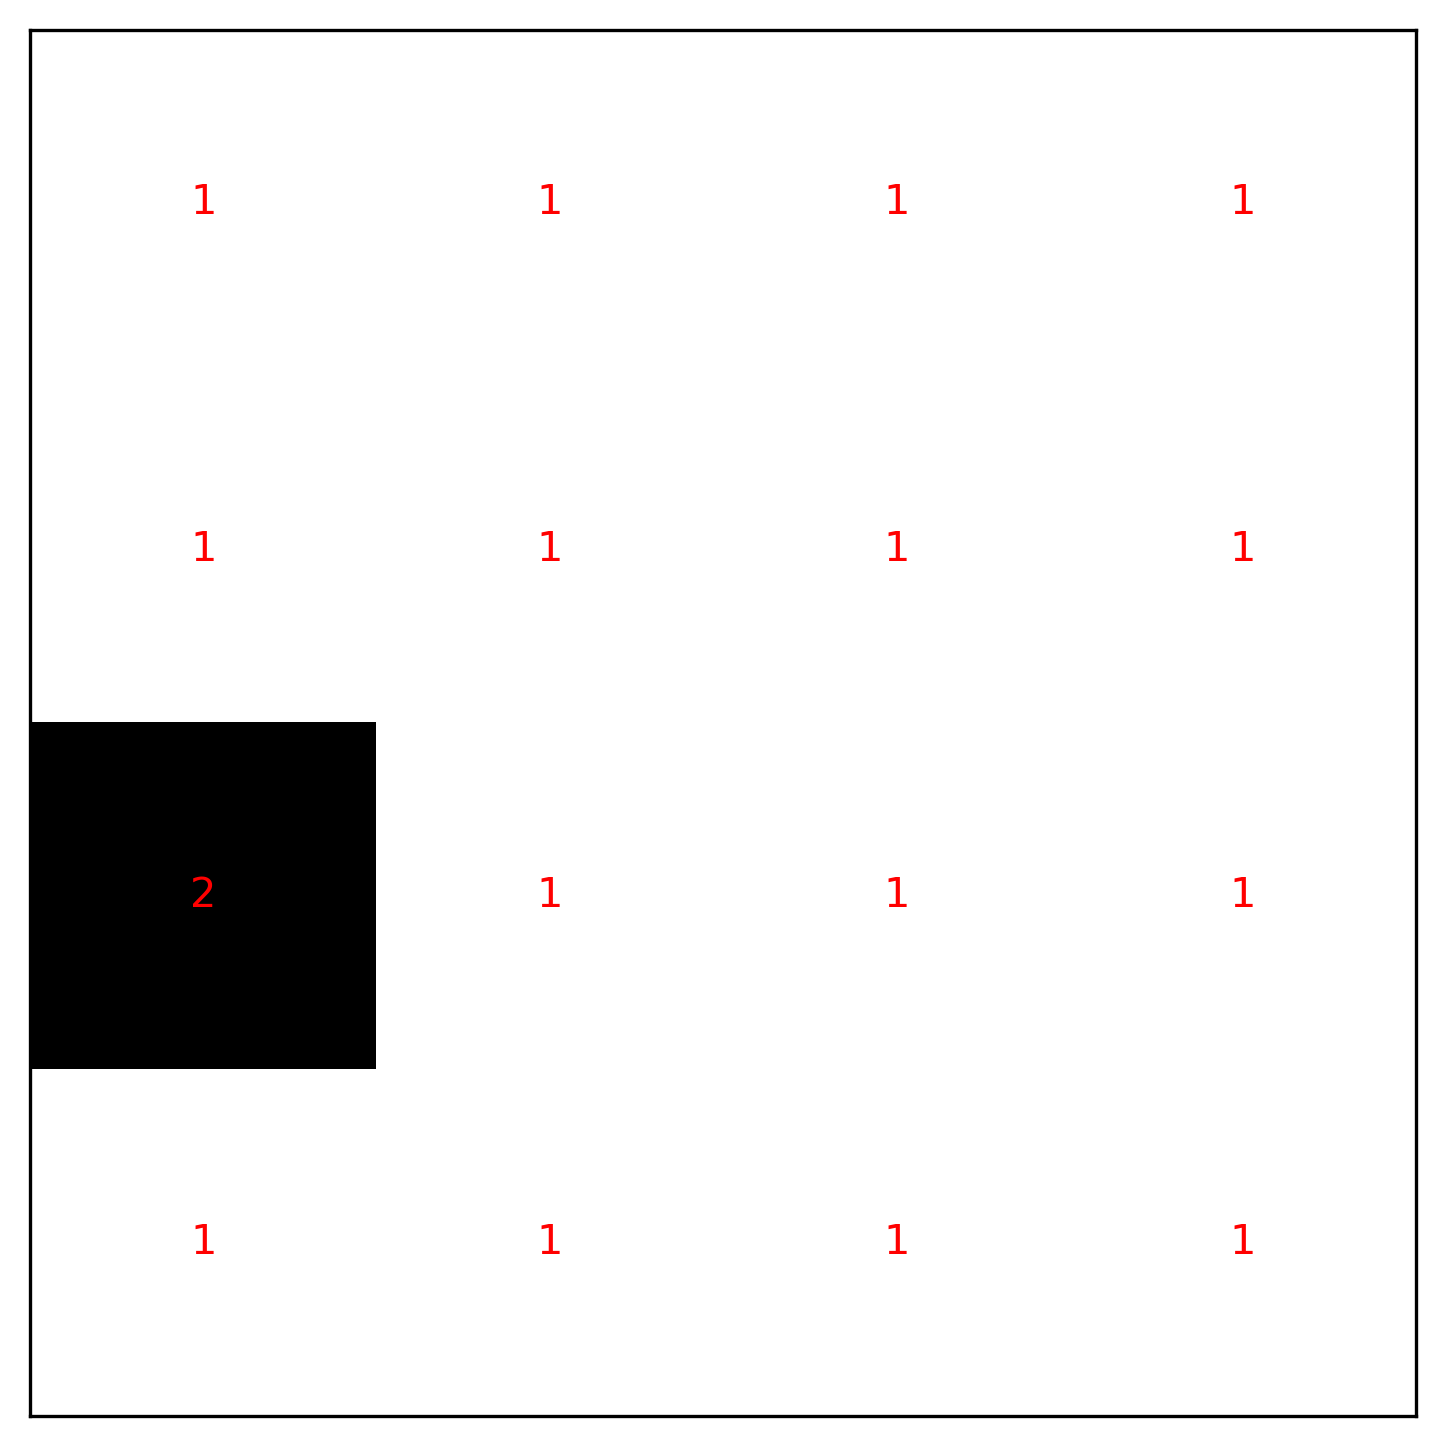

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define the 4x4 grid
matrix = np.array([
    [1, 1, 1, 1],
    [1, 1, 1, 1],
    [2, 1, 1, 1],
    [1, 1, 1, 1]
])

def plot_matrix(matrix, dpi=300):
    fig, ax = plt.subplots(figsize=(6, 6), dpi=dpi)
    cax = ax.matshow(matrix, cmap='Greys')

    for (i, j), val in np.ndenumerate(matrix):
        ax.text(j, i, f'{val}', ha='center', va='center', color='red')

    plt.xticks([])
    plt.yticks([])
    plt.show()

plot_matrix(matrix)


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("movement_sequences.csv")
df.head()

,frame_1,frame_2,frame_3,frame_4,frame_5,frame_6,frame_7,frame_8,frame_9,frame_10,...,frame_92,frame_93,frame_94,frame_95,frame_96,frame_97,frame_98,frame_99,frame_100,direction
0,"[[200, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1...","[[1, 1, 1, 1, 1, 1, 1], [200, 1, 1, 1, 1, 1, 1...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[200, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1...","[[1, 1, 1, 1, 1, 1, 1], [200, 1, 1, 1, 1, 1, 1...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...",...,"[[200, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1...","[[1, 1, 1, 1, 1, 1, 1], [200, 1, 1, 1, 1, 1, 1...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[200, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1...","[[1, 1, 1, 1, 1, 1, 1], [200, 1, 1, 1, 1, 1, 1...",up
1,"[[200, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1...","[[1, 1, 1, 1, 1, 1, 1], [200, 1, 1, 1, 1, 1, 1...","[[1, 1, 1, 1, 1, 1, 1], [200, 1, 1, 1, 1, 1, 1...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...",...,"[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[200, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1...","[[200, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1...","[[1, 1, 1, 1, 1, 1, 1], [200, 1, 1, 1, 1, 1, 1...",up
2,"[[200, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1...","[[1, 1, 1, 1, 1, 1, 1], [200, 1, 1, 1, 1, 1, 1...","[[1, 1, 1, 1, 1, 1, 1], [200, 1, 1, 1, 1, 1, 1...","[[1, 1, 1, 1, 1, 1, 1], [200, 1, 1, 1, 1, 1, 1...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...",...,"[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...","[[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1],...",up
3,"[[200, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1...","[[1, 200, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1...","[[1, 1, 200, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1...","[[1, 1, 1, 200, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1...","[[1, 1, 1, 1, 200, 1, 1], [1, 1, 1, 1, 1, 1, 1...","[[1, 1, 1, 1, 1, 200, 1], [1, 1, 1, 1, 1, 1, 1...","[[1, 1, 1, 1, 1, 1, 200], [1, 1, 1, 1, 1, 1, 1...","[[200, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1...","[[1, 200, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1...","[[1, 1, 200, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1...",...,"[[200, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1...","[[1, 200, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1...","[[1, 1, 200, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1...","[[1, 1, 1, 200, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1...","[[1, 1, 1, 1, 200, 1, 1], [1, 1, 1, 1, 1, 1, 1...","[[1, 1, 1, 1, 1, 200, 1], [1, 1, 1, 1, 1, 1,